<a href="https://colab.research.google.com/github/Sowmya74/Indian_Electronic_Vehicles_Analysis/blob/main/Indian_EV_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Kaggle API preparation

In [1]:
# Upload the kaggle.json file from your local machine
from google.colab import files
uploaded = files.upload()

# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions to ensure it's protected

# Now, you can use the Kaggle API to download datasets


Saving kaggle.json to kaggle.json


#2. Checking available datasets

In [2]:
!kaggle datasets list

ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                           Student Performance Factors                          94KB  2024-09-02 10:53:57          10819        228  1.0              
waqi786/country-comparison-dataset-usa-and-more                   🌍 Country Comparison Dataset (USA & More) 🌍          14KB  2024-09-10 11:53:28           1341         22  1.0              
abdullah0a/world-happiness-data-2024-explore-life                 World Happiness Data 2024 | Emotions Analysis       181KB  2024-09-17 13:04:01           1057         28  1.0              
hanaksoy/customer-purchasing-behaviors            

#3. Checking India EV datasets and set filtering constraints

In [3]:
# Search for datasets with the keyword "India and ev"
!kaggle datasets list -s "india ev" --sort-by votes

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deedydas/cbse-schools-data                                   CBSE Schools Data                                     3MB  2018-03-26 09:37:06           2438         39  0.7058824        
srinrealyf/india-ev-market-data                              Detailed India EV Market Data 2001 - 2024            28KB  2024-08-14 05:28:50           1661         33  1.0              
nezukokamaado/e-v-charging-stations                          EV Charging Stations                                354KB  2024-01-09 13:17:31            515         16  0.8235294        
deadprstkrish/ev-cars-user-reviews-india                     Electric Vehic

#4. Prepare the dataset

In [4]:
# Download the dataset from Kaggle
!kaggle datasets download -d srinrealyf/india-ev-market-data

# Unzip the downloaded file
!unzip india-ev-market-data.zip


Dataset URL: https://www.kaggle.com/datasets/srinrealyf/india-ev-market-data
License(s): apache-2.0
  0% 0.00/28.1k [00:00<?, ?B/s]
100% 28.1k/28.1k [00:00<00:00, 37.5MB/s]
Archive:  india-ev-market-data.zip
  inflating: EV Maker by Place.csv   
  inflating: OperationalPC.csv       
  inflating: Vehicle Class - All.csv  
  inflating: ev_cat_01-24.csv        
  inflating: ev_sales_by_makers_and_cat_15-24.csv  


#5. Processing

In [5]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
from google.colab import widgets  # Import the widgets module to create interactive tabs in Colab
import matplotlib.pyplot as plt  # Import Matplotlib for plotting charts and visualizations

In [6]:
# Read each CSV file
df_ev_maker = pd.read_csv("EV Maker by Place.csv")  # Load the CSV file containing EV makers and their locations
df_operational_pc = pd.read_csv("OperationalPC.csv")  # Load the CSV file with operational public charging stations (PCS) by state
df_vehicle_class = pd.read_csv("Vehicle Class - All.csv")  # Load vehicle registration data across various classes and years
df_ev_cat = pd.read_csv("ev_cat_01-24.csv")  # Load the CSV file containing EV categories and sales data from 2001 to 2024
df_ev_sales = pd.read_csv("ev_sales_by_makers_and_cat_15-24.csv")  # Load sales data by makers and EV category from 2015 to 2024

In [7]:
# Import necessary libraries
import pandas as pd  # Pandas is used for data manipulation and reading the CSV files
from google.colab import widgets  # Widgets allows creating interactive UI elements like tabs in Google Colab

# Create a TabBar with labels for each CSV file
tb = widgets.TabBar(['EV Maker by Place', 'OperationalPC', 'Vehicle Class', 'EV Category', 'EV Sales'])
# `TabBar()` creates a tabbed interface where different tabs are labeled according to the CSV files loaded.
# Each label represents a tab where a specific CSV's data will be displayed.

# Define the function to display tables in each tab
with tb.output_to(0, select=True):
    # Display the first few rows of the 'EV Maker by Place' DataFrame in the first tab
    print("EV Maker by Place")
    print(df_ev_maker.head())  # Displays the first few rows of the 'EV Maker by Place' CSV data

with tb.output_to(1):
    # Display the first few rows of the 'OperationalPC' DataFrame in the second tab
    print("OperationalPC")
    print(df_operational_pc.head())  # Displays the first few rows of the 'OperationalPC' CSV data

with tb.output_to(2):
    # Display the first few rows of the 'Vehicle Class - All' DataFrame in the third tab
    print("Vehicle Class - All")
    print(df_vehicle_class.head())  # Displays the first few rows of the 'Vehicle Class' CSV data

with tb.output_to(3):
    # Display the first few rows of the 'ev_cat_01-24' DataFrame in the fourth tab
    print("EV Category 2001-2024")
    print(df_ev_cat.head())  # Displays the first few rows of the 'ev_cat_01-24' CSV data

with tb.output_to(4):
    # Display the first few rows of the 'ev_sales_by_makers_and_cat_15-24' DataFrame in the fifth tab
    print("EV Sales by Makers and Categories")
    print(df_ev_sales.head())  # Displays the first few rows of the 'ev_sales_by_makers_and_cat_15-24' CSV data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EV Maker by Place
            EV Maker        Place        State
0        Tata Motors         Pune  Maharashtra
1  Mahindra Electric    Bengaluru    Karnataka
2       Ather Energy    Bengaluru    Karnataka
3      Hero Electric    New Delhi        Delhi
4       Ola Electric  Krishnagiri   Tamil Nadu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

OperationalPC
               State  No. of Operational PCS
0  Andaman & Nicobar                       3
1     Andhra Pradesh                     327
2  Arunachal Pradesh                       9
3              Assam                      86
4              Bihar                     124


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Vehicle Class - All
                     Vehicle Class Total Registration
0  FOUR WHEELER (INVALID CARRIAGE)             21,346
1              HEAVY GOODS VEHICLE          58,70,865
2              HEAVY MOTOR VEHICLE           1,02,965
3          HEAVY PASSENGER VEHICLE           8,28,189
4              LIGHT GOODS VEHICLE        1,02,49,591


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EV Category 2001-2024
       Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
0         0                                0                    0   
1  01/01/01                                0                    1   
2  01/01/02                                0                    2   
3  01/01/03                                0                    1   
4  01/01/04                                0                    2   

   HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
0                    0                        0                    0   
1                    0                        0                    9   
2                    1                        0                  266   
3                    2                        0                   35   
4                    0                        1                   14   

   LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  MEDIUM GOODS VEHICLE  \
0                    0                        0          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EV Sales by Makers and Categories
  Cat                          Maker  2015  2016  2017  2018  2019  2020  \
0  3W    "VOLVO GROUP INDIA PVT LTD"     0     0    31    12     0     0   
1  3W         3EV INDUSTRIES PVT LTD     0     0     0     0     0     0   
2  2W         3GB TECHNOLOGY PVT LTD     0     0     0     1     0     0   
3  3W         3GB TECHNOLOGY PVT LTD     0     1     1     0     0     0   
4  3W  3S INDUSTRIES PRIVATE LIMITED     0     0     0     0    48    66   

   2021  2022  2023  2024  
0     0     0     0     0  
1   112   390   545    51  
2     0     0     0     0  
3     0     0     0     0  
4    43    68   266   578  


<IPython.core.display.Javascript object>

In [8]:
df_ev_maker

EV Maker        Place        State
0                   Tata Motors         Pune  Maharashtra
1             Mahindra Electric    Bengaluru    Karnataka
2                  Ather Energy    Bengaluru    Karnataka
3                 Hero Electric    New Delhi        Delhi
4                  Ola Electric  Krishnagiri   Tamil Nadu
..                          ...          ...          ...
57          YC Electric Vehicle        Delhi        Delhi
58  Dilli Electric Auto Pvt Ltd    New Delhi        Delhi
59           Electrotherm India    Ahmedabad      Gujarat
60        Lohia Auto Industries     Kashipur  Uttarakhand
61                 Euler Motors    New Delhi        Delhi

[62 rows x 3 columns]

Here's an explanation of the columns from each dataset you've provided:

### 1. **EV Maker by Place Dataset**
- **EV Maker**: The name of the electric vehicle (EV) manufacturer.
- **Place**: The city or location where the EV maker is based or has significant operations.
- **State**: The state in India where the EV maker is located.

### 2. **OperationalPC Dataset**
- **State**: The name of the state in India.
- **No. of Operational PCS**: The number of operational **Public Charging Stations (PCS)** available for EVs in that state.

### 3. **Vehicle Class - All Dataset**
- **Vehicle Class**: The type of vehicle class (e.g., heavy goods vehicle, light goods vehicle, two-wheeler).
- **Total Registration**: The total number of vehicle registrations for the specific vehicle class across India.

### 4. **EV Category 2001-2024 Dataset**
- **Date**: The date of the data record.
- **FOUR WHEELER (INVALID CARRIAGE)**, **HEAVY GOODS VEHICLE**, **HEAVY MOTOR VEHICLE**, etc.: Different vehicle categories being tracked. Each column represents the total number of registrations in that vehicle category on a given date.
- **THREE WHEELER (T)**, **TWO WHEELER (T)**, etc.: Specific columns for tracking three-wheeler and two-wheeler vehicles, with distinctions between passenger, goods, or non-transport categories.

### 5. **EV Sales by Makers and Categories Dataset**
- **Cat**: Category of the vehicle (e.g., 2W for two-wheeler, 3W for three-wheeler).
- **Maker**: The manufacturer of the electric vehicle.
- **2015-2024**: The number of EV sales for each manufacturer across different years, from 2015 to 2024.

These datasets collectively help analyze the growth and distribution of the electric vehicle ecosystem in India, including the number of EV manufacturers, operational charging infrastructure, and vehicle sales trends across years and regions. Let me know if you'd like to dive deeper into any specific analysis!

In [9]:
%%capture
# Install necessary libraries
!pip install geopandas matplotlib
!wget https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson -O india_states.geojson


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x800 with 0 Axes>

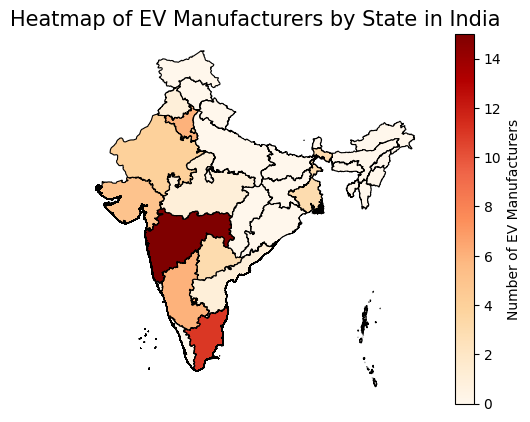

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

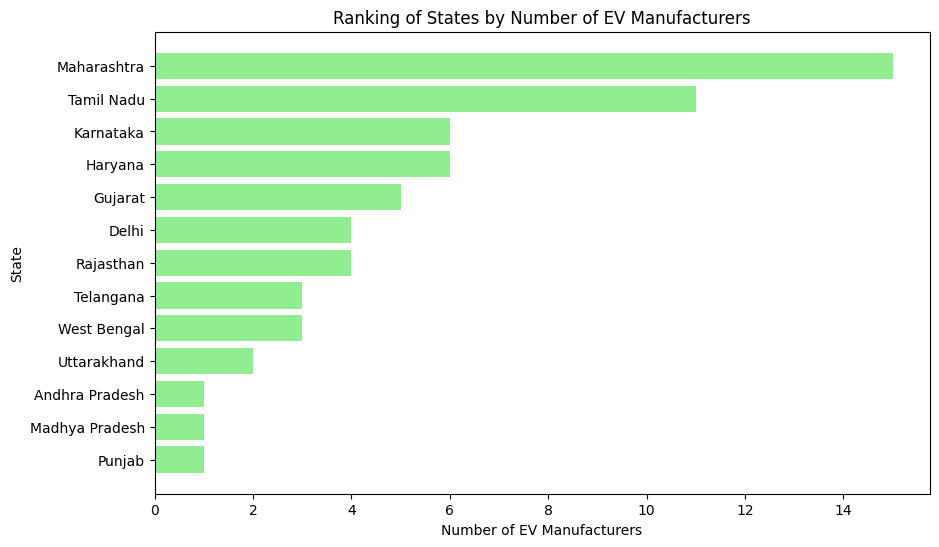

<IPython.core.display.Javascript object>

In [14]:
#@title evmc
import pandas as pd  # Import pandas for data manipulation and analysis
import geopandas as gpd  # Import geopandas for handling geospatial data
import matplotlib.pyplot as plt  # Import matplotlib for plotting heatmaps and bar plots
from google.colab import widgets  # Import Google Colab widgets for creating interactive UI elements

# Load the GeoJSON file with Indian state boundaries
india_states = gpd.read_file("india_states.geojson")  # Load the GeoJSON file that contains state boundaries of India

# Aggregating the EV manufacturers by state from the df_ev_maker DataFrame
state_counts = df_ev_maker['State'].value_counts().reset_index()
# Use `value_counts()` to count the number of EV manufacturers by state.
# Reset index to make it a DataFrame.
state_counts.columns = ['State', 'EV_Maker_Count']  # Rename the columns for clarity.

# Merge the GeoDataFrame with the aggregated data
merged_data = india_states.merge(state_counts, left_on="NAME_1", right_on="State", how="left")
# Merge the state data (from the GeoJSON file) with the counts of EV manufacturers for each state.

# Fill missing values with 0 (for states with no EV manufacturers)
merged_data['EV_Maker_Count'].fillna(0, inplace=True)  # If a state doesn't have EV manufacturers, fill it with 0.

# Create a TabBar with two tabs: one for the heatmap and one for the bar plot
tb = widgets.TabBar(['Heatmap', 'Bar Plot'], location='start')
# Creating two tabs: one for visualizing the heatmap and the other for visualizing the bar plot.

# Tab 1: Plot the geo heatmap
with tb.output_to(0, select=True):  # First tab for the heatmap
    plt.figure(figsize=(10, 8))  # Create a figure for the plot
    ax = merged_data.plot(column='EV_Maker_Count', cmap='OrRd', legend=True,
                          legend_kwds={'label': "Number of EV Manufacturers",
                                       'orientation': "vertical"},
                          edgecolor='black', linewidth=0.8)
    # Plot the GeoDataFrame with EV manufacturer counts using a heatmap.
    # `cmap` is used to set the color map (Oranges-Reds), and a legend is added.

    # Add a title and remove axes
    plt.title("Heatmap of EV Manufacturers by State in India", fontsize=15)  # Add title
    ax.set_axis_off()  # Hide axis for cleaner visualization

    # Show the plot
    plt.show()  # Display the heatmap

# Tab 2: Plot the bar plot
with tb.output_to(1):  # Second tab for the bar plot
    # Sort the data for a better ranking plot
    df_sorted = state_counts.sort_values(by="EV_Maker_Count", ascending=False)
    # Sorting the states based on the number of EV manufacturers in descending order

    plt.figure(figsize=(10, 6))  # Create a figure for the bar plot
    plt.barh(df_sorted['State'], df_sorted['EV_Maker_Count'], color='lightgreen')
    # Create a horizontal bar chart where states are on the y-axis and the number of EV manufacturers is on the x-axis.
    plt.xlabel("Number of EV Manufacturers")  # Add x-axis label
    plt.ylabel("State")  # Add y-axis label
    plt.title("Ranking of States by Number of EV Manufacturers")  # Add title to the plot

    # Display the bar plot
    plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value on top
    plt.show()  # Display the bar plot


### **Maharashtra, Tamil Nadu and Karnataka are the top 3 states in India with highest number of Electronic Vehicles Manufactured.**

In [15]:
df_operational_pc

State  No. of Operational PCS
0   Andaman & Nicobar                       3
1      Andhra Pradesh                     327
2   Arunachal Pradesh                       9
3               Assam                      86
4               Bihar                     124
5          Chandigarh                      12
6        Chhattisgarh                     149
7         D&D and DNH                       1
8               Delhi                    1886
9                 Goa                     113
10            Gujarat                     476
11            Haryana                     377
12   Himachal Pradesh                      44
13  Jammu and Kashmir                      47
14          Jharkhand                     135
15          Karnataka                    1041
16             Kerala                     852
17        Lakshadweep                       1
18     Madhya Pradesh                     341
19        Maharashtra                    3079
20            Manipur                      17
21          Meghalaya                      21
22           Nagaland                       6
23             Odisha                     198
24        Pondicherry                      23
25             Punjab                     158
26          Rajasthan                     500
27             Sikkim                       2
28         Tamil Nadu                     643
29          Telangana                     481
30            Tripura                      18
31      Uttar Pradesh                     582
32        Uttarakhand                      76
33        West Bengal                     318

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x800 with 0 Axes>

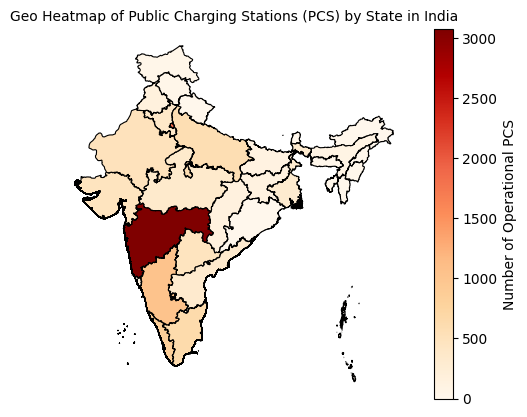

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

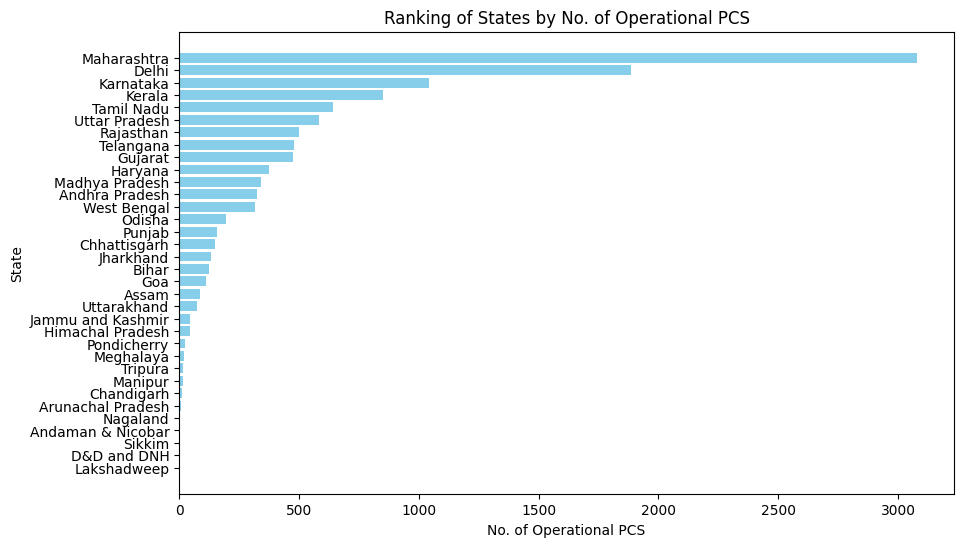

<IPython.core.display.Javascript object>

In [16]:
#@title opc
import matplotlib.pyplot as plt  # For plotting visualizations like heatmaps and bar plots
from google.colab import widgets  # To create interactive tabs in Google Colab
import pandas as pd  # For data manipulation with pandas DataFrames
import geopandas as gpd  # For geospatial data processing with GeoDataFrames

# Load the state boundaries GeoJSON file
# india_states = gpd.read_file("india_states.geojson")
# Commented out here; should load a GeoJSON file containing the state boundaries of India.

# Merge the GeoDataFrame (state boundaries) with the df_operational_pc DataFrame
merged_data1 = india_states.merge(df_operational_pc, left_on="NAME_1", right_on="State", how="left")
# Merging the state boundary GeoDataFrame (india_states) with the operational PCS data (df_operational_pc).
# "NAME_1" from india_states is used to match the state names in "State" from df_operational_pc.

# Fill NaN values with 0 for states without data
merged_data1['No. of Operational PCS'].fillna(0, inplace=True)
# Fill missing values (NaN) for states that don't have public charging stations with 0.

# Create a TabBar with two tabs: one for the heatmap and one for the bar plot
tb = widgets.TabBar(['Heatmap', 'Bar Plot'], location='start')
# A tabbed interface with two tabs for visualization: 'Heatmap' and 'Bar Plot'.

# Tab 1: Plot the heatmap
with tb.output_to(0, select=True):  # Select the first tab for the heatmap
    plt.figure(figsize=(10, 8))  # Create a figure for the plot
    ax = merged_data1.plot(column='No. of Operational PCS', cmap='OrRd', legend=True,
                          legend_kwds={'label': "Number of Operational PCS",
                                       'orientation': "vertical"},
                          edgecolor='black', linewidth=0.8)
    # Plot the GeoDataFrame with the 'No. of Operational PCS' column using a heatmap.
    # 'cmap' sets the color scheme (Orange-Red), and a legend is added to show the color mapping.

    # Add a title and remove axes
    plt.title("Geo Heatmap of Public Charging Stations (PCS) by State in India", fontsize=10)
    ax.set_axis_off()  # Hide the axis to make the map look cleaner

    # Show the plot
    plt.show()  # Display the heatmap

# Tab 2: Plot the bar plot
with tb.output_to(1):  # Select the second tab for the bar plot
    # Sort the data for a better ranking plot
    df_sorted = df_operational_pc.sort_values(by="No. of Operational PCS", ascending=False)
    # Sort the states based on the number of public charging stations in descending order

    plt.figure(figsize=(10, 6))  # Create a figure for the bar plot
    plt.barh(df_sorted['State'], df_sorted['No. of Operational PCS'], color='skyblue')
    # Create a horizontal bar chart with states on the y-axis and PCS counts on the x-axis.
    plt.xlabel("No. of Operational PCS")  # Label for the x-axis
    plt.ylabel("State")  # Label for the y-axis
    plt.title("Ranking of States by No. of Operational PCS")  # Title of the bar plot

    # Display the bar plot
    plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value on top
    plt.show()  # Display the bar plot


### **Maharashtra, Delhi, Karnataka and Kerala are having EVs highly operational.**

In [17]:
df_vehicle_class

Vehicle Class Total Registration
0   FOUR WHEELER (INVALID CARRIAGE)             21,346
1               HEAVY GOODS VEHICLE          58,70,865
2               HEAVY MOTOR VEHICLE           1,02,965
3           HEAVY PASSENGER VEHICLE           8,28,189
4               LIGHT GOODS VEHICLE        1,02,49,591
5               LIGHT MOTOR VEHICLE        6,50,61,773
6           LIGHT PASSENGER VEHICLE          43,43,410
7              MEDIUM GOODS VEHICLE           8,75,789
8              MEDIUM MOTOR VEHICLE           1,94,600
9          MEDIUM PASSENGER VEHICLE           3,25,015
10       OTHER THAN MENTIONED ABOVE          11,26,398
11                THREE WHEELER(NT)           6,79,804
12                 THREE WHEELER(T)        1,07,08,473
13   TWO WHEELER (INVALID CARRIAGE)           1,10,788
14                  TWO WHEELER(NT)       27,49,71,646
15                   TWO WHEELER(T)           1,29,181

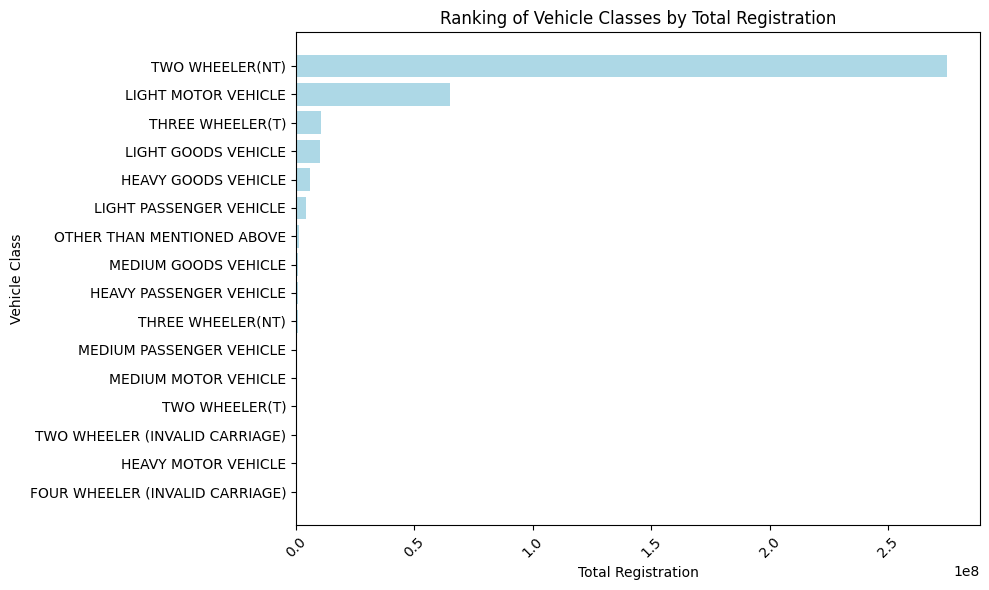

In [18]:
import matplotlib.pyplot as plt  # Import matplotlib for creating visualizations

# Remove commas from 'Total Registration' and convert to integer
df_vehicle_class['Total Registration'] = df_vehicle_class['Total Registration'].replace({',': ''}, regex=True).astype(int)
# This line removes commas from the 'Total Registration' column using the replace function and regex.
# After removing commas, the column is converted to an integer type using astype(int).

# Sort by 'Total Registration' in descending order
df_sorted = df_vehicle_class.sort_values(by='Total Registration', ascending=False)
# Sorting the DataFrame by the 'Total Registration' column in descending order so the vehicle class with the highest registrations appears first.

# Plot the horizontal bar plot
plt.figure(figsize=(10, 6))  # Create a figure with dimensions of 10 inches wide and 6 inches tall.
plt.barh(df_sorted['Vehicle Class'], df_sorted['Total Registration'], color='lightblue')
# Create a horizontal bar plot using the 'Vehicle Class' for the y-axis and 'Total Registration' for the x-axis.
# The color of the bars is set to light blue.

plt.xlabel("Total Registration")  # Set the label for the x-axis as "Total Registration".
plt.ylabel("Vehicle Class")  # Set the label for the y-axis as "Vehicle Class".
plt.title("Ranking of Vehicle Classes by Total Registration")  # Add a title to the plot.

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees to make them easier to read.

# Invert the y-axis to show the largest bar at the top
plt.gca().invert_yaxis()  # Invert the y-axis so that the vehicle class with the highest registration appears at the top.

# Show the plot
plt.tight_layout()  # Adjust the layout of the plot to ensure that all elements fit well and there is no overlap.
plt.show()  # Display the plot.


In [19]:
df_ev_cat

Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
0           0                                0                    0   
1    01/01/01                                0                    1   
2    01/01/02                                0                    2   
3    01/01/03                                0                    1   
4    01/01/04                                0                    2   
..        ...                              ...                  ...   
279  01/12/19                                0                    0   
280  01/12/20                                0                    0   
281  01/12/21                                2                    0   
282  01/12/22                                0                    0   
283  01/12/23                                3                   16   

     HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
0                      0                        0                    0   
1                      0                        0                    9   
2                      1                        0                  266   
3                      2                        0                   35   
4                      0                        1                   14   
..                   ...                      ...                  ...   
279                    0                       41                   18   
280                    0                       10                    1   
281                    1                      218                   16   
282                    0                      146                   30   
283                    0                      491                  254   

     LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  MEDIUM GOODS VEHICLE  \
0                      0                        0                     0   
1                     15                        1                     0   
2                     11                        5                     0   
3                     15                        1                     0   
4                     17                        1                     0   
..                   ...                      ...                   ...   
279                   57                       49                     0   
280                  505                       18                     0   
281                 2483                      133                     0   
282                 2925                      915                     0   
283                 7008                      499                     0   

     MEDIUM PASSENGER VEHICLE  MEDIUM MOTOR VEHICLE  \
0                           0                     0   
1                           0                     0   
2                           0                     0   
3                           0                     0   
4                           0                     1   
..                        ...                   ...   
279                        10                     0   
280                         0                     0   
281                         2                     0   
282                        15                     0   
283                        86                     0   

     OTHER THAN MENTIONED ABOVE  THREE WHEELER(NT)  \
0                             0                  0   
1                             2                  0   
2                             0                  0   
3                             1                  0   
4                             2                  0   
..                          ...                ...   
279                         197                 15   
280                         124                 17   
281                         124                 17   
282                         673                 35   
283                           0                  7   

     TWO WHEELER (INVALID CARRIAGE)  THREE WHEELER(T)  T

In [20]:
%%capture
!pip install plotly

In [21]:
print(df_ev_cat.columns)  # Check the available columns

Index(['Date', 'FOUR WHEELER (INVALID CARRIAGE)', 'HEAVY GOODS VEHICLE',
       'HEAVY MOTOR VEHICLE', 'HEAVY PASSENGER VEHICLE', 'LIGHT GOODS VEHICLE',
       'LIGHT MOTOR VEHICLE', 'LIGHT PASSENGER VEHICLE',
       'MEDIUM GOODS VEHICLE', 'MEDIUM PASSENGER VEHICLE',
       'MEDIUM MOTOR VEHICLE', 'OTHER THAN MENTIONED ABOVE',
       'THREE WHEELER(NT)', 'TWO WHEELER (INVALID CARRIAGE)',
       'THREE WHEELER(T)', 'TWO WHEELER(NT)', 'TWO WHEELER(T)'],
      dtype='object')


In [22]:
# Remove rows where all values except 'Date' are zero
df_ev_cat = df_ev_cat[(df_ev_cat.iloc[:, 1:] != 0).any(axis=1)]

In [27]:
#@title evcat_registration
import pandas as pd  # Import pandas for data manipulation and analysis
import plotly.express as px  # Import plotly express for creating simple interactive plots
import plotly.graph_objects as go  # Import plotly.graph_objects for creating complex interactive plots
from google.colab import widgets  # Import widgets from Google Colab to create interactive tabs

# Assuming df_ev_cat already has the Date column as the index and it's cleaned
# This line assumes that 'df_ev_cat' DataFrame is pre-loaded, has the 'Date' column set as the index, and the data is already cleaned.

# Drop the 'year' column before resampling the data
#df_monthly = df_ev_cat.drop(columns='Year').resample('M').sum()  # Monthly aggregation
# Resampling the DataFrame by months and summing the values, resulting in a monthly trend for vehicle registrations.

#df_yearly = df_ev_cat.drop(columns='Year').resample('Y').sum()  # Yearly aggregation
# Resampling the DataFrame by years and summing the values, resulting in a yearly trend for vehicle registrations.
#-----
# Assuming df_ev_cat has a 'Date' column
df_ev_cat = df_ev_cat.set_index('Date')  # Set the 'Date' column as the index
df_ev_cat.index = pd.to_datetime(df_ev_cat.index) # Convert the index to DatetimeIndex

# Now you can proceed with resampling
df_monthly = df_ev_cat.resample('M').sum()
df_yearly = df_ev_cat.resample('Y').sum()

# Extract the available years from the DataFrame index for the dropdown
available_years = df_yearly.index.year.unique().tolist()
# Extracts the unique years from the 'df_yearly' index and stores them in a list. This will be used in the dropdown menu to select a year.

# Create a TabBar with four tabs: Monthly, Yearly, Ranking, and Rolling
tb = widgets.TabBar(['Monthly Trend', 'Yearly Trend', 'Type Ranking', 'Yearly Rolling'], location='start')
# Creates a tabbed interface with four tabs labeled 'Monthly Trend', 'Yearly Trend', 'Type Ranking', and 'Yearly Rolling' for different views of the data.

# Tab 1: Monthly Trend
with tb.output_to(0, select=True):  # Select the first tab to show the monthly trend
    fig_monthly = px.line(df_monthly,
                          x=df_monthly.index,  # The x-axis is the monthly time (Date)
                          y=df_monthly.columns,  # The y-axis shows all vehicle categories
                          labels={'value': 'Number of Registrations', 'variable': 'Vehicle Category'},
                          title='Monthly Trend of Vehicle Registrations Across Categories')
    # Creates a line chart with the monthly time on the x-axis and vehicle categories on the y-axis.
    # The chart shows the number of registrations for each vehicle category across months.

    # Add range slider and range selector for time selection
    fig_monthly.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),  # Button to view 1 month of data
                    dict(count=6, label="6m", step="month", stepmode="backward"),  # Button to view 6 months of data
                    dict(count=1, label="YTD", step="year", stepmode="todate"),  # Button to view data Year-To-Date
                    dict(count=1, label="1y", step="year", stepmode="backward"),  # Button to view 1 year of data
                    dict(step="all")  # Button to view all data
                ])
            ),
            rangeslider=dict(visible=True),  # Adds a slider for selecting a specific time range
            type="date"  # The x-axis will be treated as date data
        )
    )
    fig_monthly.show()  # Display the monthly trend plot in the first tab

# Tab 2: Yearly Trend
with tb.output_to(1):  # Select the second tab to show the yearly trend
    fig_yearly = px.line(df_yearly,
                         x=df_yearly.index,  # The x-axis is the yearly time (Date)
                         y=df_yearly.columns,  # The y-axis shows all vehicle categories
                         labels={'value': 'Number of Registrations', 'variable': 'Vehicle Category'},
                         title='Yearly Trend of Vehicle Registrations Across Categories')
    # Creates a line chart with yearly data, similar to the monthly trend but aggregated by year.

    # Add range slider and range selector for time selection
    fig_yearly.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),  # Button for 1 month view
                    dict(count=6, label="6m", step="month", stepmode="backward"),  # Button for 6 months view
                    dict(count=1, label="YTD", step="year", stepmode="todate"),  # Button for Year-To-Date
                    dict(count=1, label="1y", step="year", stepmode="backward"),  # Button for 1 year view
                    dict(step="all")  # Button for all data
                ])
            ),
            rangeslider=dict(visible=True),  # Adds a slider for selecting a specific year range
            type="date"  # The x-axis is treated as date data
        )
    )
    fig_yearly.show()  # Display the yearly trend plot in the second tab

# Tab 3: Yearly Ranking with dropdown for selecting the year
with tb.output_to(2):  # Select the third tab for yearly ranking of vehicle categories
    # Create a base figure for rankings
    fig = go.Figure()  # Initialize a figure using plotly.graph_objects for more customization

    # Add a trace for each year but keep them invisible initially
    for year in available_years:
        selected_year_data = df_yearly.loc[str(year)].T.squeeze().sort_values(ascending=False)
        # For each year, extract the data, transpose it, and sort the vehicle categories by total registrations in descending order.

        fig.add_trace(go.Bar(
            x=selected_year_data.values,  # Total registrations on the x-axis
            y=selected_year_data.index,  # Vehicle categories on the y-axis
            orientation='h',  # Horizontal bar chart
            name=f"Vehicle Type Ranking for {year}",  # Label the trace with the year
            visible=False  # Initially hide all traces (data for each year)
        ))

    # Make the first year's data visible by default
    fig.data[0].visible = True  # Make the first year's data (trace) visible initially

    # Create dropdown buttons for year selection
    dropdown_buttons = []
    for i, year in enumerate(available_years):
        dropdown_buttons.append(dict(
            method='update',  # Update the plot based on the selected year
            label=str(year),  # Label for the dropdown
            args=[{'visible': [i == j for j in range(len(available_years))]},  # Show only the selected year's data
                  {'title': f"Vehicle Type Ranking for {year}"}]  # Update the title to reflect the selected year
        ))

    # Update layout to include the dropdown
    fig.update_layout(
        updatemenus=[dict(
            active=0,  # The first dropdown option is selected by default
            buttons=dropdown_buttons,  # Add the dropdown buttons
            x=1.15,  # Position the dropdown on the right side of the plot
            y=0.5,  # Vertical positioning of the dropdown
            showactive=True,  # Highlight the active selection
        )],
        title=f"Vehicle Type Ranking for {available_years[0]}",  # Initial title for the plot
        xaxis_title="Total Registrations",  # X-axis label
        yaxis_title="Vehicle Category"  # Y-axis label
    )

    fig.show()  # Display the yearly ranking plot in the third tab

# Tab 4: Dynamic Yearly Rolling View
with tb.output_to(3):  # Select the fourth tab for a dynamic rolling view
    # Convert the yearly data to a long format for easier plotting with animation
    df_long = df_yearly.reset_index().melt(id_vars='Date', var_name='Vehicle Category', value_name='Registrations')
    # Reshape the data from wide to long format so that each vehicle category and its registrations are listed under separate rows.

    # Create an animated bar plot
    fig_rolling = px.bar(df_long,
                         x='Registrations',  # The number of registrations on the x-axis
                         y='Vehicle Category',  # The vehicle category on the y-axis
                         animation_frame=df_long['Date'].dt.year,  # Animate over years
                         color='Vehicle Category',  # Different colors for different vehicle categories
                         orientation='h',  # Horizontal bar plot
                         title='Dynamic Yearly Rolling Vehicle Registrations',
                         labels={'Registrations': 'Total Registrations', 'Vehicle Category': 'Vehicle Category'},
                         range_x=[0, df_long['Registrations'].max() * 1.1]  # Set the x-axis range dynamically
                         )

    # Update layout for smoother animation (without adding a second play button)
    fig_rolling.update_layout(
        xaxis_title="Total Registrations",  # Label for the x-axis
        yaxis_title="Vehicle Category",  # Label for the y-axis
        transition=dict(duration=500)  # Duration for each frame of the animation
    )

    fig_rolling.show()  # Display the dynamic rolling plot in the fourth tab


<ipython-input-27-931bd9ef4a2e>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ev_cat.index = pd.to_datetime(df_ev_cat.index) # Convert the index to DatetimeIndex


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_ev_sales

Cat                                            Maker  2015  2016  2017  \
0     3W                      "VOLVO GROUP INDIA PVT LTD"     0     0    31   
1     3W                           3EV INDUSTRIES PVT LTD     0     0     0   
2     2W                           3GB TECHNOLOGY PVT LTD     0     0     0   
3     3W                           3GB TECHNOLOGY PVT LTD     0     1     1   
4     3W                    3S INDUSTRIES PRIVATE LIMITED     0     0     0   
...   ..                                              ...   ...   ...   ...   
1381  2W        ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH)     0     0     0   
1382  2W  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)     0     0     0   
1383  2W          ZHONGHUALONG (IMPORTER: POWORO PVT LTD)     0     0     0   
1384  2W           ZHONGXING (IMPORTER:GREENO AUTOMOBILE)     0     0     0   
1385  3W                      ZOHAN TRADERS AND BIG METRO     0     0     0   

      2018  2019  2020  2021  2022  2023  2024  
0       12     0     0     0     0     0     0  
1        0     0     0   112   390   545    51  
2        1     0     0     0     0     0     0  
3        0     0     0     0     0     0     0  
4        0    48    66    43    68   266   578  
...    ...   ...   ...   ...   ...   ...   ...  
1381     0     0     0     0    21    45     9  
1382     0     0     0     0     0    64     6  
1383     0     0     0     0     0     0    54  
1384     0     0     0     0     0     0     5  
1385     0     0     0     0     5   131    74  

[1386 rows x 12 columns]

In [ ]:
#@title evsales
import pandas as pd  # Import pandas for data manipulation and data frame operations
import plotly.express as px  # Import plotly express for creating simple, interactive plots
import plotly.graph_objects as go  # Import plotly graph_objects for more customizable plots
from google.colab import widgets  # Import widgets from Google Colab for creating an interactive tabbed interface

# Assume df_ev_sales is already loaded with the sales data
# Reshape the data to a long format for easier plotting
df_sales_long = df_ev_sales.melt(id_vars=['Cat', 'Maker'],
                                 var_name='Year',
                                 value_name='Sales')
# Use the `melt` function to reshape the wide-format data into a long format.
# This makes the 'Year' and 'Sales' columns easier to work with for plotting,
# and the data is organized by 'Cat' (category), 'Maker', 'Year', and 'Sales'.

# Convert the Year column to integer and filter for non-zero sales
df_sales_long['Year'] = df_sales_long['Year'].astype(int)
# Convert the 'Year' column to an integer type for easier sorting and manipulation.

df_sales_long = df_sales_long[df_sales_long['Sales'] > 0]  # Remove rows with 0 sales
# Filter out any rows where the sales are zero, keeping only rows with non-zero sales values.

# Extract the available years for dropdown selection
available_years = df_sales_long['Year'].unique()
# Extract all the unique years from the 'Year' column to create a dropdown selection in one of the tabs.

# Create a TabBar with four tabs: Yearly Trends, Ranking, Rolling View, and Simple Bar Ranking
tb = widgets.TabBar(['Yearly Trend', 'Type Ranking', 'Yearly Rolling', 'Simple Bar Ranking'], location='start')
# Create an interactive TabBar with four tabs for different types of visualizations:
# 'Yearly Trend', 'Type Ranking', 'Yearly Rolling', and 'Simple Bar Ranking'.

# Tab 1: Yearly Trend
with tb.output_to(0, select=True):
    df_yearly = df_sales_long.groupby(['Year', 'Maker']).sum().reset_index()
    # Group the sales data by 'Year' and 'Maker' and sum the sales for each year and maker.

    fig_yearly = px.line(df_yearly,
                         x='Year',
                         y='Sales',
                         color='Maker',
                         title='Yearly Trend of Vehicle Sales Across Makers')
    # Create a line plot where the x-axis represents the 'Year', the y-axis shows 'Sales',
    # and the lines are colored based on the vehicle 'Maker'. This allows you to see how sales change over time for each maker.

    # Add range slider and range selector for time selection
    fig_yearly.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1y", step="year", stepmode="backward"),  # View 1 year of data
                    dict(count=5, label="5y", step="year", stepmode="backward"),  # View 5 years of data
                    dict(step="all")  # View all available data
                ])
            ),
            rangeslider=dict(visible=True),  # Add a range slider for fine-tuning time selection
            type="date"  # Treat the x-axis as dates
        )
    )
    fig_yearly.show()
    # Show the yearly trend plot in the first tab.

# Tab 2: Yearly Ranking
with tb.output_to(1):
    # Create a base figure for rankings
    fig = go.Figure()  # Initialize a figure object using plotly.graph_objects for more advanced customization.

    # Add a trace for each year but keep them invisible initially
    for year in available_years:
        df_year_selected = df_sales_long[df_sales_long['Year'] == year]
        # Filter the sales data for the selected year.

        df_ranking = df_year_selected.groupby('Maker')['Sales'].sum().sort_values(ascending=False)
        # Group the data by 'Maker' and sum the sales for that year,
        # then sort the makers by their total sales in descending order.

        fig.add_trace(go.Bar(
            x=df_ranking.values,  # Set the sales values as the x-axis data
            y=df_ranking.index,  # Set the maker names as the y-axis data
            orientation='h',  # Create a horizontal bar chart
            name=f"Vehicle Sales Ranking for {year}",  # Label each trace with the corresponding year
            visible=False  # Initially keep all traces invisible
        ))

    # Make the first year's data visible by default
    fig.data[0].visible = True  # Make the first year's data visible by default.

    # Create dropdown buttons for year selection
    dropdown_buttons = []
    for i, year in enumerate(available_years):
        dropdown_buttons.append(dict(
            method='update',  # Define how the plot will update when a button is clicked
            label=str(year),  # Label the button with the corresponding year
            args=[{'visible': [i == j for j in range(len(available_years))]},  # Make the selected year's trace visible
                  {'title': f"Vehicle Sales Ranking for {year}"}]  # Update the plot title with the selected year
        ))

    # Update layout to include the dropdown and adjust margins and text wrapping
    fig.update_layout(
        updatemenus=[dict(
            active=0,  # Set the first dropdown option as active by default
            buttons=dropdown_buttons,  # Add the dropdown buttons to the plot
            x=1.15,  # Position the dropdown to the right of the plot
            y=0.5,  # Vertical position of the dropdown
            showactive=True,  # Show which button is active
        )],
        title=f"Vehicle Sales Ranking for {available_years[0]}",  # Set the initial plot title for the first year
        xaxis_title="Total Sales",  # Label the x-axis as 'Total Sales'
        yaxis_title="Vehicle Maker",  # Label the y-axis as 'Vehicle Maker'
        yaxis=dict(
            automargin=True,  # Automatically adjust the margin for longer maker names
            tickangle=0,  # Keep the maker names horizontal for easier reading
            tickmode='linear',  # Ensure that all makers are displayed as ticks
        ),
        margin=dict(l=200)  # Increase the left margin to accommodate long maker names
    )

    fig.show()
    # Display the yearly ranking plot in the second tab.

# Tab 3: Dynamic Yearly Rolling View
with tb.output_to(2):
    # Create an animated bar plot
    fig_rolling = px.bar(df_sales_long,
                         x='Sales',  # Set sales as the x-axis data
                         y='Maker',  # Set makers as the y-axis data
                         animation_frame='Year',  # Create an animation based on the 'Year' column
                         color='Maker',  # Color the bars by maker
                         orientation='h',  # Create a horizontal bar plot
                         title='Dynamic Yearly Rolling Vehicle Sales',
                         labels={'Sales': 'Total Sales', 'Maker': 'Vehicle Maker'},
                         range_x=[0, df_sales_long['Sales'].max() * 1.1]  # Set the x-axis range, adding 10% buffer
                         )

    # Update the layout for smoother animation and better y-axis label handling
    fig_rolling.update_layout(
        xaxis_title="Total Sales",  # Label the x-axis
        yaxis_title="Vehicle Maker",  # Label the y-axis
        yaxis=dict(
            automargin=True,  # Automatically adjust the margin for longer maker names
            tickangle=0,  # Keep maker names horizontal
        ),
        margin=dict(l=200),  # Increase the left margin to accommodate long maker names
        transition=dict(duration=500)  # Set animation duration to 500 milliseconds for smoother transitions
    )

    fig_rolling.show()
    # Display the dynamic yearly rolling plot in the third tab.

# Tab 4: Simple Bar Ranking
with tb.output_to(3):
    # Calculate the total sales for each maker across all years
    df_total_sales = df_sales_long.groupby('Maker')['Sales'].sum().sort_values(ascending=False)
    # Group the data by 'Maker' and sum the total sales across all years,
    # then sort the makers by total sales in descending order.

    # Create a simple bar plot for the total sales ranking
    fig_simple_ranking = px.bar(df_total_sales,
                                x=df_total_sales.values,  # Set the total sales as x-axis values
                                y=df_total_sales.index,  # Set the maker names as y-axis values
                                orientation='h',  # Create a horizontal bar plot
                                title='Total Vehicle Sales by Maker (All Years)',
                                labels={'x': 'Total Sales', 'y': 'Vehicle Maker'})

    # Adjust y-axis layout for long maker names
    fig_simple_ranking.update_layout(
        yaxis=dict(
            automargin=True,  # Automatically adjust the margin for long maker names
            tickangle=0,  # Keep the maker names horizontal
        ),
        margin=dict(l=200)  # Increase left margin to accommodate long maker names
    )

    fig_simple_ranking.show()
    # Display the total sales ranking plot in the fourth tab.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
#@title evsales
import pandas as pd  # Import pandas for data manipulation and handling DataFrames
import plotly.express as px  # Import plotly express for creating simple, interactive plots
import plotly.graph_objects as go  # Import plotly graph_objects for more customizable plots
from google.colab import widgets  # Import widgets from Google Colab for creating interactive tab interfaces

# Assuming df_ev_sales and df_ev_cat are already loaded and cleaned
# Assume that df_ev_sales (sales data) and df_ev_cat (category data) have been preloaded and cleaned for use.

# Reshape df_ev_sales to long format for easier processing
df_sales_long = df_ev_sales.melt(id_vars=['Cat', 'Maker'],
                                 var_name='Year',
                                 value_name='Sales')
# Reshape the df_ev_sales DataFrame from wide to long format using the `melt()` function.
# 'Cat' and 'Maker' are kept as id variables, while 'Year' and 'Sales' are the new columns.

# Convert the Year column to integer and filter for non-zero sales
df_sales_long['Year'] = df_sales_long['Year'].astype(int)
# Convert the 'Year' column from string/object to integer for easier processing and numerical operations.

df_sales_long = df_sales_long[df_sales_long['Sales'] > 0]  # Remove rows with 0 sales
# Filter out rows where 'Sales' equals 0. Only retain rows with positive sales values.

# Tab 1: Top 10 Makers Bubble Chart
def top_10_makers_by_year():
    # Group by Year and Maker, then sum the Sales
    df_top_makers = df_sales_long.groupby(['Year', 'Maker']).sum().reset_index()
    # Group the data by 'Year' and 'Maker', and sum the 'Sales' for each combination.
    # Reset the index to make the grouped data into a clean DataFrame.

    # Rank within each year and filter for Top 10 makers per year
    df_top_makers = df_top_makers.groupby('Year', group_keys=False).apply(lambda x: x.nlargest(10, 'Sales'))
    # For each year, rank the makers by their total sales and select the top 10 makers based on sales using the nlargest function.

    # Create a bubble chart
    fig = px.scatter(df_top_makers,
                     x='Year',
                     y='Maker',
                     size='Sales',
                     color='Maker',
                     hover_name='Maker',
                     title='Top 10 Makers by Sales Size Across the Years',
                     labels={'Sales': 'Total Sales', 'Year': 'Year', 'Maker': 'Vehicle Maker'},
                     size_max=60)
    # Use plotly express to create a scatter (bubble) chart.
    # The size of each bubble is based on the 'Sales' column, and the color is determined by the 'Maker'.
    # Add a title, axis labels, and set the maximum bubble size to 60.

    # Adjust layout
    fig.update_layout(
        xaxis_title="Year",  # Set x-axis label
        yaxis_title="Vehicle Maker",  # Set y-axis label
        height=600,  # Set figure height
        margin=dict(l=100, r=100, t=100, b=100)  # Set margins around the plot
    )

    return fig  # Return the bubble chart figure for display

# Tab 2: Top 5 EV Types by Year Bubble Chart
def top_5_ev_types_by_year(df_ev_cat):
    # Create a 'Year' column by extracting the year from the Date index
    df_ev_cat['Year'] = df_ev_cat.index.year
    # Extract the year from the Date index of df_ev_cat and create a new column 'Year'.

    # Reshape the DataFrame to have 'Vehicle Type' and 'Sales'
    df_ev_cat_long = df_ev_cat.melt(id_vars='Year', var_name='Vehicle Type', value_name='Sales')
    # Reshape df_ev_cat from wide format to long format. 'Vehicle Type' is set as a new variable,
    # and 'Sales' represents the values.

    # Filter non-zero sales
    df_ev_cat_long = df_ev_cat_long[df_ev_cat_long['Sales'] > 0]
    # Filter out rows where 'Sales' is 0 to retain only relevant sales data.

    # Group by Year and Vehicle Type, then sum the Sales
    df_top_ev_types = df_ev_cat_long.groupby(['Year', 'Vehicle Type']).sum().reset_index()
    # Group the data by 'Year' and 'Vehicle Type' and sum the 'Sales' for each combination.
    # Reset the index to convert the grouped data into a DataFrame.

    # Rank within each year and filter for Top 5 EV types per year
    df_top_ev_types = df_top_ev_types.groupby('Year', group_keys=False).apply(lambda x: x.nlargest(5, 'Sales'))
    # For each year, rank the vehicle types by total sales and select the top 5 types using the nlargest function.

    # Create a bubble chart
    fig = px.scatter(df_top_ev_types,
                     x='Year',
                     y='Vehicle Type',
                     size='Sales',
                     color='Vehicle Type',
                     hover_name='Vehicle Type',
                     title='Top 5 EV Types by Sales Size Across the Years',
                     labels={'Sales': 'Total Sales', 'Year': 'Year', 'Vehicle Type': 'EV Type'},
                     size_max=60)
    # Use plotly express to create a bubble chart. The size of each bubble is based on 'Sales',
    # and the color is determined by 'Vehicle Type'. Add labels, a title, and set the maximum bubble size.

    # Adjust layout
    fig.update_layout(
        xaxis_title="Year",  # Set x-axis label
        yaxis_title="EV Type",  # Set y-axis label
        height=600,  # Set figure height
        margin=dict(l=100, r=100, t=100, b=100)  # Set margins around the plot
    )

    return fig  # Return the bubble chart figure for display

# Create the TabBar with two tabs
tb = widgets.TabBar(['Top 10 Makers', 'Top 5 EV Types'], location='start')
# Create a TabBar widget with two tabs: one for the "Top 10 Makers" and one for the "Top 5 EV Types".

# Tab 1: Top 10 Makers
with tb.output_to(0, select=True):
    fig_makers = top_10_makers_by_year()  # Generate the top 10 makers bubble chart
    fig_makers.show()  # Display the chart in the first tab

# Tab 2: Top 5 EV Types
with tb.output_to(1):
    fig_ev_types = top_5_ev_types_by_year(df_ev_cat)  # Generate the top 5 EV types bubble chart
    fig_ev_types.show()  # Display the chart in the second tab


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
from google.colab import output
import dash
from dash import dcc, html
import plotly.express as px
import dash_bootstrap_components as dbc

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div(children=[
    html.H2(children="EV Sales Dashboard"),

    html.Div(children='''
        Interactive Dashboard for EV Sales Data.
    '''),

    dbc.Row([
        dbc.Col([
            dcc.Graph(
                id='fig_makers',
                figure=fig_makers
            )
        ], width=6),
        dbc.Col([
            dcc.Graph(
                id='fig_ev_types',
                figure=fig_ev_types
            )
        ], width=6)
    ]),



    dbc.Row([
        dbc.Col([
            dcc.Graph(
                id='fig_ranking',
                figure=fig
            )
        ], width=6),
        dbc.Col([
            dcc.Graph(
                id='fig_rolling',
                figure=fig_rolling
            )
        ], width=6)
    ]),
])


if __name__ == '__main__':
    # Run the Dash app
    app.run_server(port=8050, debug=True)

    # Serve the app in an iframe
    output.serve_kernel_port_as_iframe(8050)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>